## GLOBAL FOOD PRICES_ TIME SERIES

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
pd.options.display.float_format = "{:,.2f}".format
sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
gfp = pd.read_csv('wfpvam_foodprices.csv')

In [3]:
#Setting display
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000) 

In [4]:
gfp.head()

,date,country,city,market,product,currency,type,unit,mp_month,mp_year,price,continent
0,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00,Asia
1,2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00",Africa
2,2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00,Africa
3,2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62,Americas
4,2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64,Americas


In [5]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1871957 rows and 12 columns


In [6]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871957 entries, 0 to 1871956
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   country    object 
 2   city       object 
 3   market     object 
 4   product    object 
 5   currency   object 
 6   type       object 
 7   unit       object 
 8   mp_month   int64  
 9   mp_year    int64  
 10  price      float64
 11  continent  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 171.4+ MB


In [7]:
gfp.head()

,date,country,city,market,product,currency,type,unit,mp_month,mp_year,price,continent
0,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00,Asia
1,2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00",Africa
2,2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00,Africa
3,2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62,Americas
4,2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64,Americas


In [8]:
gfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1871957,257,2020-10-01,35827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1871957,98,Rwanda,136993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1871957,616,North/Amajyaruguru,597057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1871957,3193,National Average,18173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,1871957,816,Rice (imported) - Retail,51567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,1871957,84,XOF,244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1871957,4,Retail,1705390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,1871957,121,KG,1447701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp_month,"1,871,957.00",NaN,NaN,NaN,6.39,3.46,1.00,3.00,6.00,9.00,12.00
mp_year,"1,871,957.00",NaN,NaN,NaN,"2,015.97",4.23,"2,000.00","2,013.00","2,017.00","2,020.00","2,021.00"


In [9]:
#Checking for missing data
gfp.isnull().sum()

date         0
country      0
city         0
market       0
product      0
currency     0
type         0
unit         0
mp_month     0
mp_year      0
price        0
continent    0
dtype: int64

## Time Series Analysis

In [10]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

## Preproceesing

In [11]:
gfp['date'] = pd.to_datetime(gfp['date'])
gfp.set_index("date", inplace = True)

In [12]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1871957 entries, 2000-01-01 to 2021-05-01
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   country    object 
 1   city       object 
 2   market     object 
 3   product    object 
 4   currency   object 
 5   type       object 
 6   unit       object 
 7   mp_month   int64  
 8   mp_year    int64  
 9   price      float64
 10  continent  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 171.4+ MB


In [13]:
gfp.head()

,country,city,market,product,currency,type,unit,mp_month,mp_year,price,continent
date,,,,,,,,,,,
2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00,Asia
2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00",Africa
2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00,Africa
2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62,Americas
2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64,Americas


## Downsampling

In [14]:
gfp_monthly = gfp.resample(rule= 'M').median()
gfp_monthly.shape

(257, 3)

In [15]:
gfp_monthly.head()

,mp_month,mp_year,price
date,,,
2000-01-31,1,2000,50.00
2000-02-29,2,2000,44.00
2000-03-31,3,2000,41.00
2000-04-30,4,2000,38.50
2000-05-31,5,2000,35.00


In [16]:
gfp_monthly.drop(['mp_month','mp_year'] , axis = 1, inplace = True)

Text(0, 0.5, 'Price')

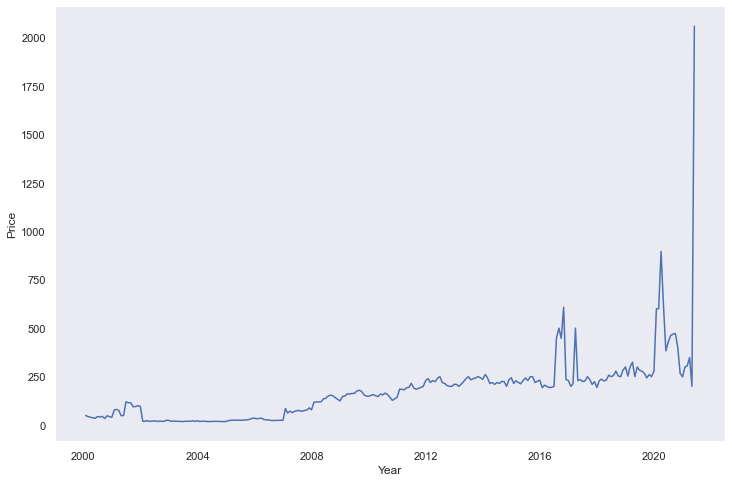

In [17]:
plt.plot(gfp_monthly.index, gfp_monthly['price'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Price')

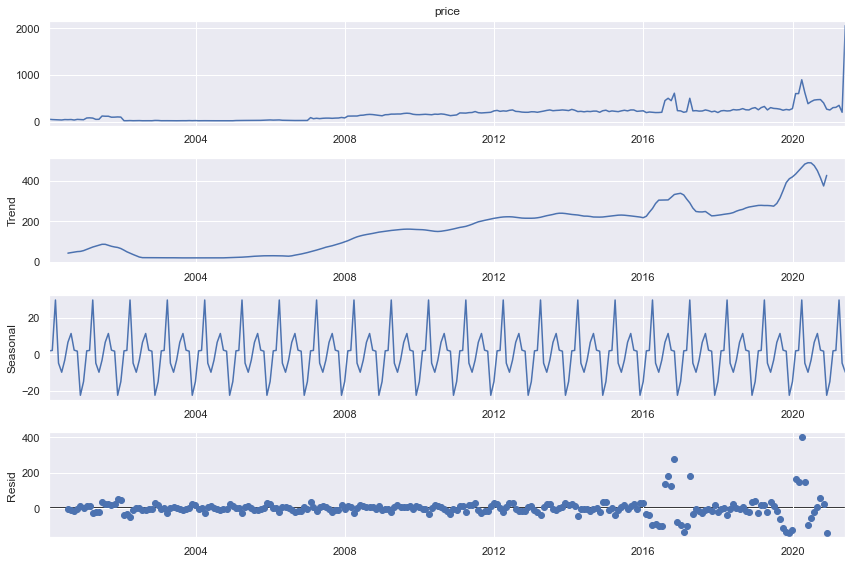

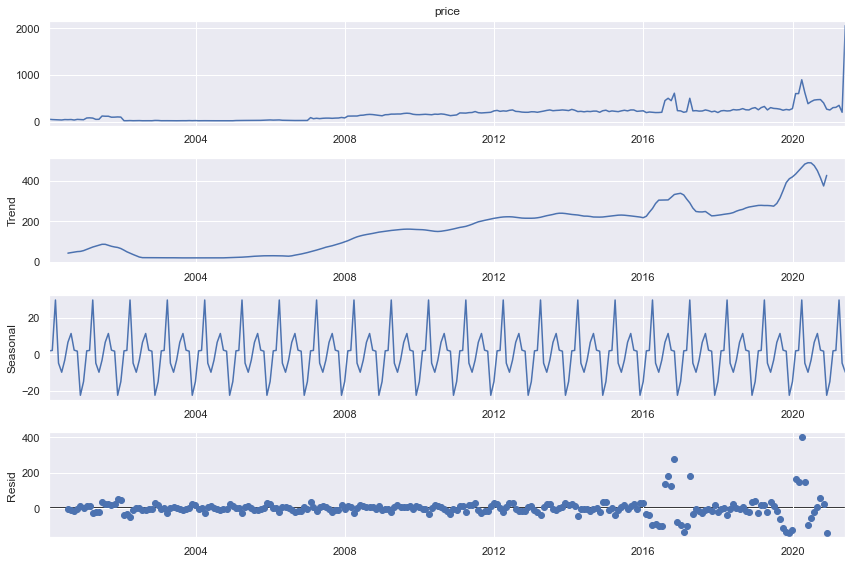

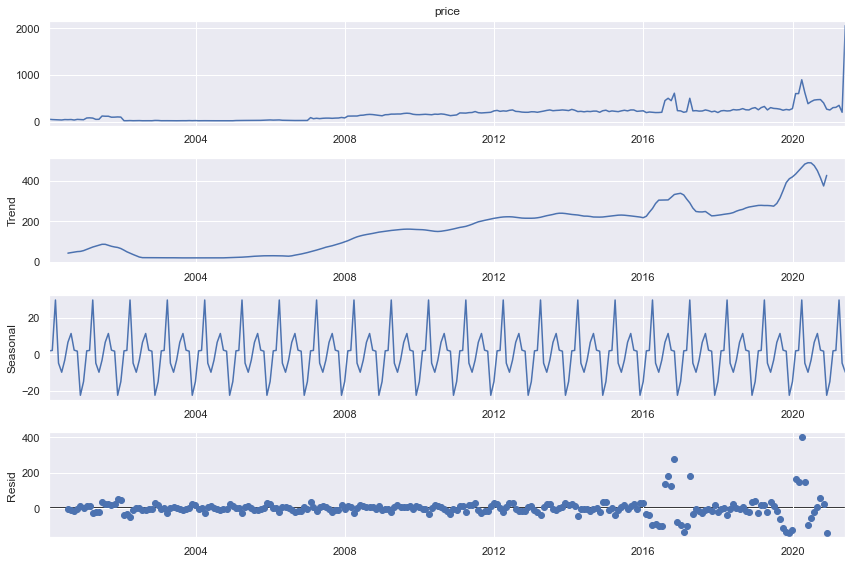

In [18]:
decompose_series = sm.tsa.seasonal_decompose(gfp_monthly['price'], model='additive')
decompose_series.plot().savefig('TS_decomposition.svg', format='svg', dpi=1000)
decompose_series.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(gfp_monthly)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: 2.0646298384870385
p-value: 0.9987512659009226
No. of lags used: 16
No. of observations used : 240
Critical Values:
   1%: -3.4578942529658563
   5%: -2.8736593200231484
   10%: -2.573228767361111


**From the results obtained, the p-value is greater than the critical value at a 5% significance level and,** 

**the ADF statistic is greater that any of the critical values obtain.**

**This confirms that the series is indeed non-stationary.**

**We will proceed to time series to stationary by removing trend and seasonality**

### Autocorrelation & Partial Autocorrelation Plot

In [20]:
from statsmodels.tsa.stattools import  acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

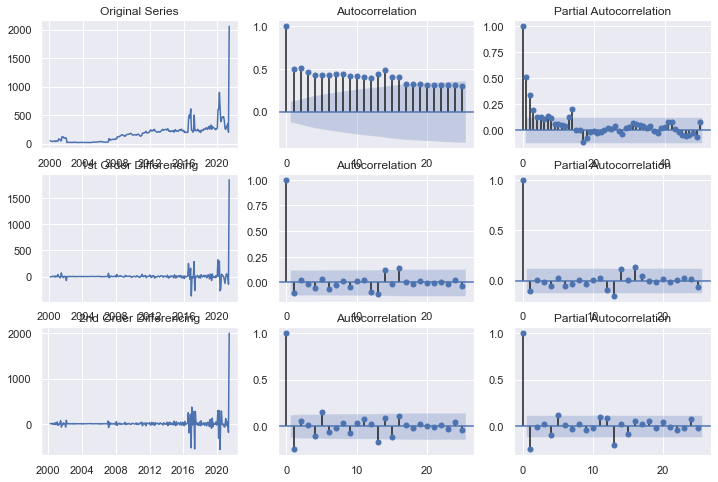

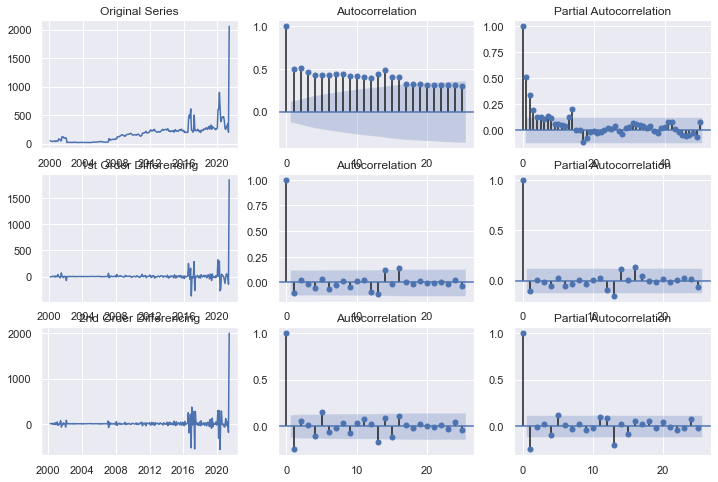

In [21]:
# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(gfp_monthly); axes[0, 0].set_title('Original Series')
plot_acf(gfp_monthly, ax=axes[0, 1])
plot_pacf(gfp_monthly, lags=50, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(gfp_monthly.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(gfp_monthly.diff().dropna(), ax=axes[1, 1])
plot_pacf((gfp_monthly).diff().dropna(), ax=axes[1, 2])


# 2nd Differencing
axes[2, 0].plot(gfp_monthly['price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(gfp_monthly.diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(gfp_monthly.diff().diff().dropna(), ax=axes[2, 2])

In [22]:
# ADF Test for 2 order of differencing
result = adfuller(gfp_monthly.diff().diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -7.910592671393707
p-value: 3.957760204249669e-12
No. of observations used : 240
Critical Values:
   1%: -3.458128284586202
   5%: -2.873761835239286
   10%: -2.5732834559706235


### Box-Cox Tranformation

Transform the data to be normally distributed

In [23]:
from scipy.special import inv_boxcox
from scipy.stats import boxcox

In [24]:
# Box - Cox Transform
gfp_monthly['price'], lam = boxcox(gfp_monthly['price'])

In [25]:
# Box-cox transformation flag
input_transform_flag = 'Yes' 

In [26]:
gfp_monthly.head()

,price
date,
2000-01-31,6.42
2000-02-29,6.10
2000-03-31,5.93
2000-04-30,5.78
2000-05-31,5.56


In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Baseline Model - ARIMA

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gfp_monthly['price'], order=(1,2,1))
model_fit= model.fit()

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.price   No. Observations:                  255
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -351.243
Method:                       css-mle   S.D. of innovations              0.948
Date:                Thu, 15 Jul 2021   AIC                            710.487
Time:                        04:23:47   BIC                            724.652
Sample:                    03-31-2000   HQIC                           716.184
                         - 05-31-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.001      1.066      0.286      -0.001       0.002
ar.L1.D2.price    -0.3200      0.083     -3.833      0.000      -0.484      -0.156
ma.L1.D2.price    -1.0000      0.011    -89.721      0.000      -1.022      -0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1249           +0.0000j            3.1249            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

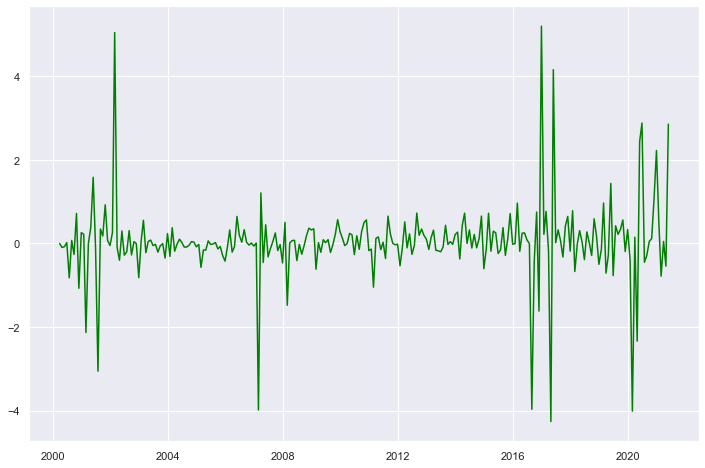

In [30]:
plt.plot(model_fit.fittedvalues, color='green')

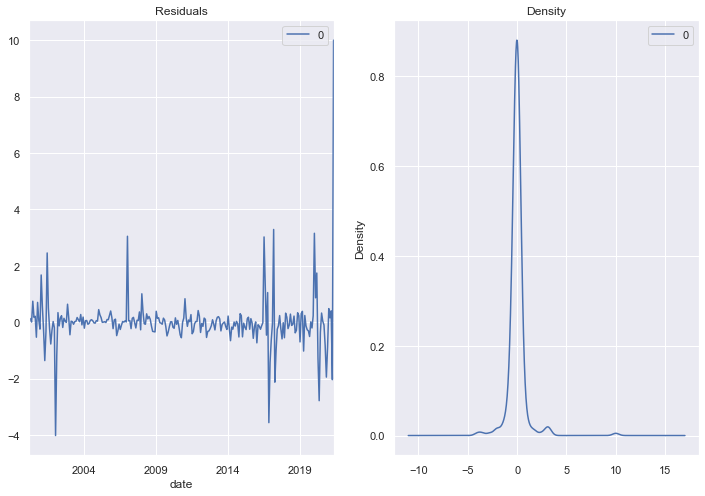

In [31]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

In [32]:
residuals.describe()

,0
count,255.00
mean,-0.00
std,0.96
min,-4.02
25%,-0.23
50%,-0.01
75%,0.15
max,10.00


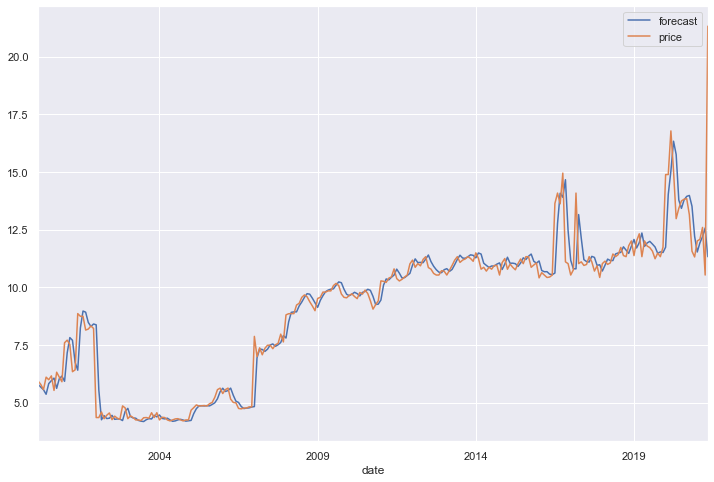

In [33]:
# Plot the original series and the predicted series
model_fit.plot_predict(dynamic= False).savefig('original vs predicted Price.svg', format='svg', dpi=1000)

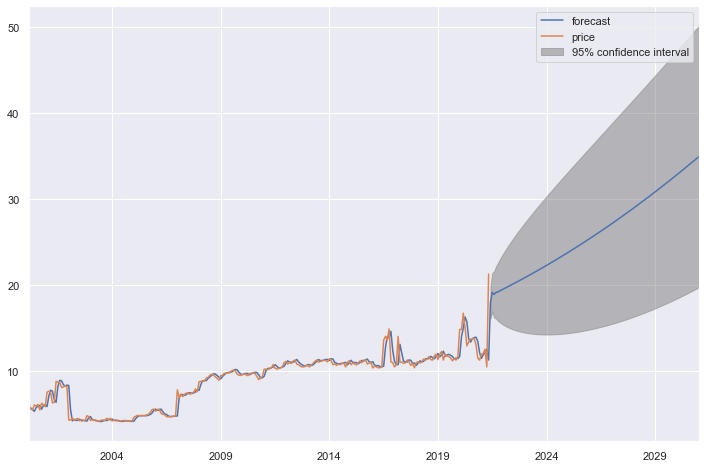

In [34]:
# Plot the original series and the forecasted series - Making prediction
model_fit.plot_predict(dynamic= False, start='2000', end='2031').savefig('Forcasting into the Future.svg', format='svg', dpi=1000)

### Train - Test Split

In [45]:
train_size= int(gfp_monthly.shape[0]*0.8)
gfp_train, gfp_test = gfp_monthly.price[0:train_size], gfp_monthly.price[train_size:]
gfp_train.head()

date
2000-01-31   6.42
2000-02-29   6.10
2000-03-31   5.93
2000-04-30   5.78
2000-05-31   5.56
Freq: M, Name: price, dtype: float64

### Validate Model and Make Prediction

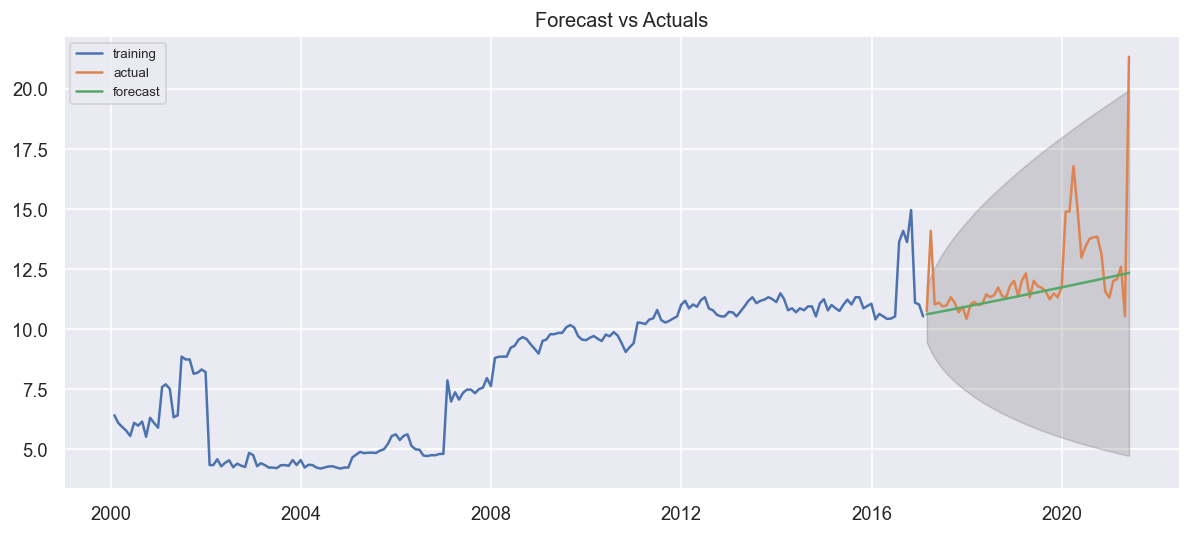

In [47]:
# Build Model
model = ARIMA(gfp_train, order=(1,2,1))
fitted = model.fit()

# Forecast
fc, se, conf = fitted.forecast(52, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=gfp_test.index)
lower_series = pd.Series(conf[:, 0], index=gfp_test.index)
upper_series = pd.Series(conf[:, 1], index=gfp_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=120).savefig('Forecast vs Actuals.png', dpi=1000)
plt.plot(gfp_train, label='training')
plt.plot(gfp_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

### Inverse transform the actual and predicted values

In [48]:
#if input_transform_flag == 'Yes':
   # gfp_test = inv_boxcox(gfp_test, lam)
    #predictions = (fc_series, lam)

In [49]:
def MASE(gfp_train, actual, forecast):
   
    n = gfp_train.shape[0]
    d = np.abs(np.diff(gfp_train) ).sum()/(n-1)
    
    errors = np.abs(actual - forecast)
    return errors.mean()/d
MASE(gfp_train, gfp_test, fc_series)

3.343449775716871

In [50]:
# Evaluation metric
def evaluate_metric(forecast, actual):
    mape = np.mean(np.abs(forecast -actual)/np.abs(forecast))*100
    mae = np.mean(np.abs(forecast - actual)) 
    return({'mape':mape, 'mae': mae})

evaluate_metric(fc_series, gfp_test) 

{'mape': 7.9801609336507235, 'mae': 0.9384201833863485}

In [51]:
#evaluate_model(fc_series, gfp_test)

In [52]:
import pickle

In [53]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [54]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model